<a href="https://www.kaggle.com/code/ranjeetshrivastav/playground-series-s3e9-catboost?scriptVersionId=129123155" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r'/kaggle/input/playground-series-s3e9/train.csv')
train.head()

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


In [3]:
test = pd.read_csv(r'/kaggle/input/playground-series-s3e9/test.csv')
test.head()

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,5407,166.1,75.4,163.8,173.8,4.6,1007.2,746.6,56
1,5408,304.0,0.0,0.0,190.0,0.0,998.0,801.0,7
2,5409,225.0,0.0,0.0,185.0,0.0,1113.0,833.0,28
3,5410,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,100
4,5411,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28


In [4]:
sub = pd.read_csv(r'/kaggle/input/playground-series-s3e9/sample_submission.csv')
sub.head()

,id,Strength
0,5407,35.452
1,5408,35.452
2,5409,35.452
3,5410,35.452
4,5411,35.452


In [5]:
print(f'train set have {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'test set have {test.shape[0]} rows and {test.shape[1]} columns.') 
print(f'sample_submission set have {sub.shape[0]} rows and {sub.shape[1]} columns.') 

train set have 5407 rows and 10 columns.
test set have 3605 rows and 9 columns.
sample_submission set have 3605 rows and 2 columns.


In [6]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            5407 non-null   float64
 1   BlastFurnaceSlag           5407 non-null   float64
 2   FlyAshComponent            5407 non-null   float64
 3   WaterComponent             5407 non-null   float64
 4   SuperplasticizerComponent  5407 non-null   float64
 5   CoarseAggregateComponent   5407 non-null   float64
 6   FineAggregateComponent     5407 non-null   float64
 7   AgeInDays                  5407 non-null   int64  
 8   Strength                   5407 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 380.3 KB


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
CementComponent,5407.0,299.168189,105.537682,102.00,213.70,297.20,375.00,540.0
BlastFurnaceSlag,5407.0,58.610579,83.417801,0.00,0.00,0.00,122.60,359.4
FlyAshComponent,5407.0,31.872795,54.605003,0.00,0.00,0.00,79.00,200.1
WaterComponent,5407.0,185.076235,18.517583,121.80,175.10,187.40,192.00,247.0
SuperplasticizerComponent,5407.0,4.108441,5.692296,0.00,0.00,0.00,8.05,32.2
CoarseAggregateComponent,5407.0,992.000718,77.148010,801.00,938.20,978.00,1047.00,1145.0
FineAggregateComponent,5407.0,771.219974,78.725253,594.00,734.30,781.20,821.00,992.6
AgeInDays,5407.0,51.751618,70.006975,1.00,7.00,28.00,56.00,365.0
Strength,5407.0,35.452071,16.401896,2.33,23.64,33.95,45.85,82.6


In [9]:
train.nunique()

CementComponent              314
BlastFurnaceSlag             224
FlyAshComponent              177
WaterComponent               215
SuperplasticizerComponent    112
CoarseAggregateComponent     342
FineAggregateComponent       376
AgeInDays                     15
Strength                     843
dtype: int64

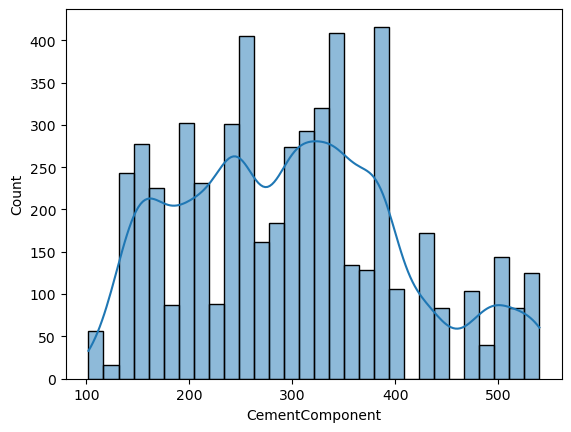

In [10]:
sns.histplot(data=train, x="CementComponent", kde=True, bins=30)
plt.show()

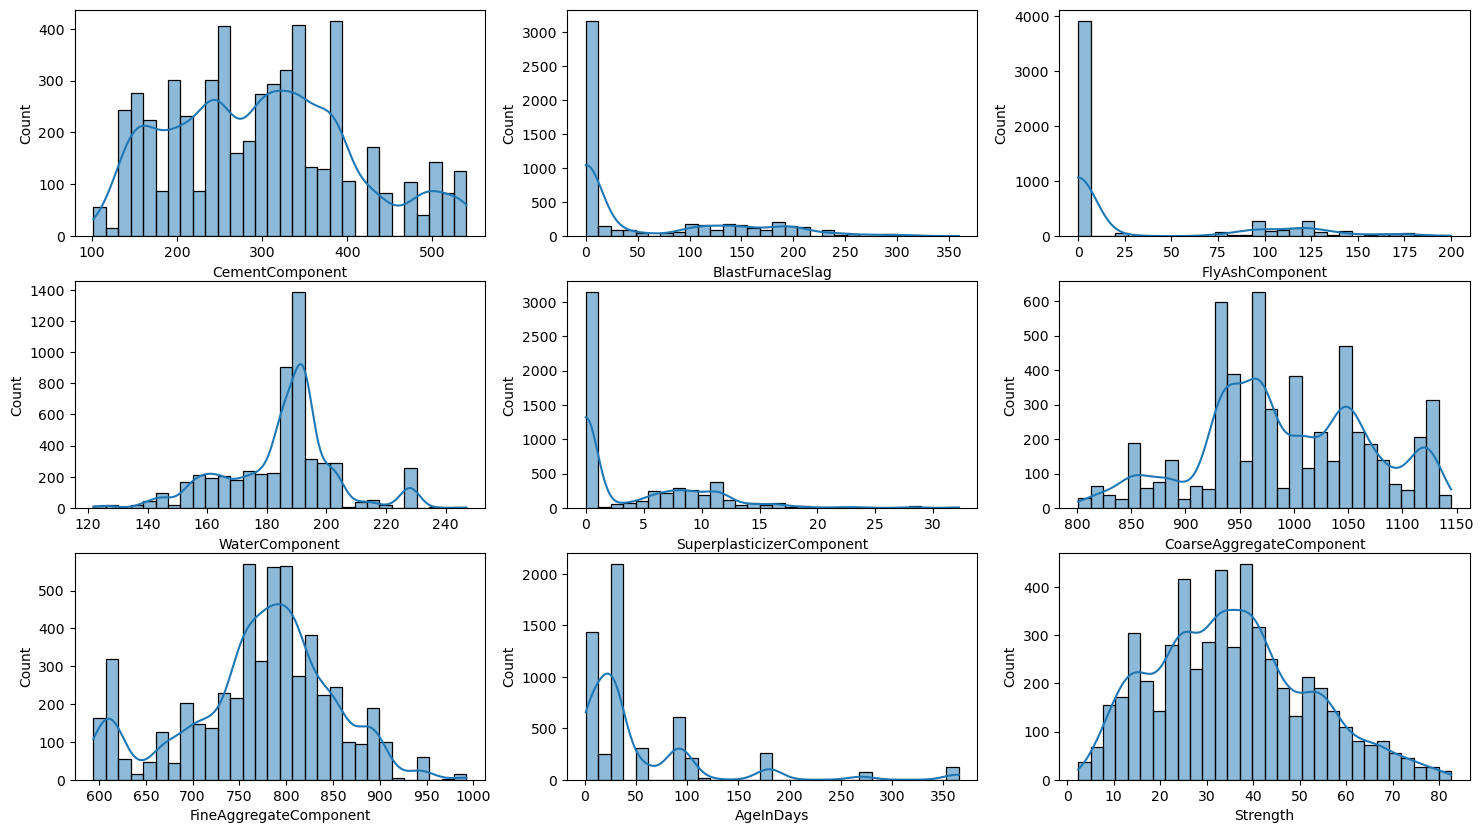

In [11]:
def plot(data):
    fig, axes = plt.subplots(3, 3, figsize=(18, 10))
    for i, ax in zip(train.columns,axes.flatten()):
        sns.histplot(data=train, x=i, kde=True, bins=30, ax=ax)
        fig.show()
        
plot(train)

In [12]:
X = train.drop('Strength',axis=1)
y = train['Strength']

In [13]:
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

folds = KFold(n_splits=5, shuffle=True)

for fold, (trn_idx, val_idx) in enumerate(folds.split(X)):
    print(f"Fold: {fold}")
    X_train, X_test = X.iloc[trn_idx], X.iloc[val_idx]
    y_train, y_test = y.iloc[trn_idx], y.iloc[val_idx]

    model = CatBoostRegressor(n_estimators=2023,learning_rate=0.01)
   
    model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
                early_stopping_rounds=100,
                verbose=False)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    
    print(f" RMSE: {rmse}")
    print("-"*50)

Fold: 0
 RMSE: 11.83661056536226
--------------------------------------------------
Fold: 1
 RMSE: 12.18705385747713
--------------------------------------------------
Fold: 2
 RMSE: 12.272726445284421
--------------------------------------------------
Fold: 3
 RMSE: 11.88596576949154
--------------------------------------------------
Fold: 4
 RMSE: 12.180392202523516
--------------------------------------------------


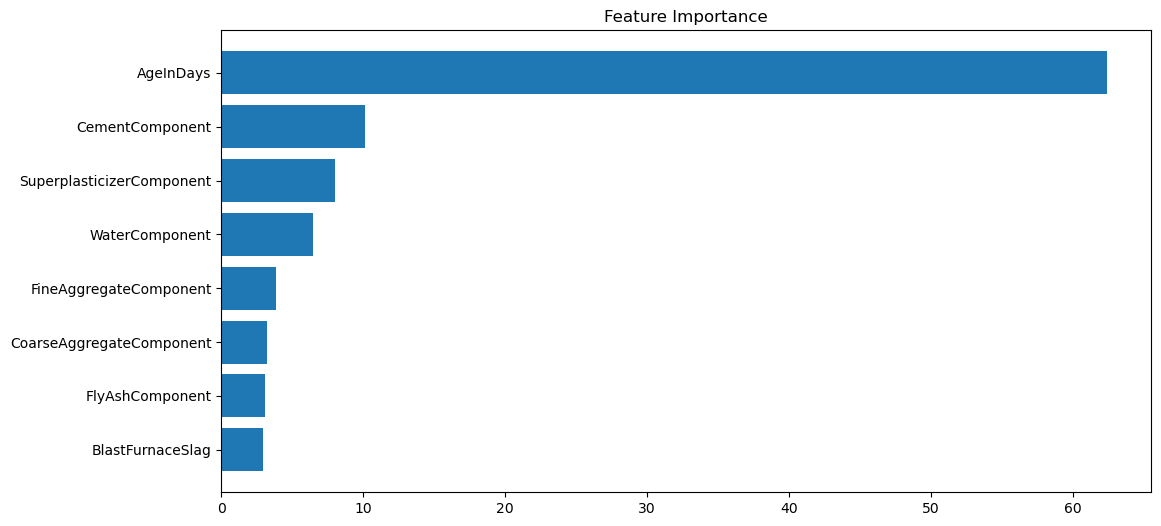

In [14]:
# Feature Importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

In [15]:
sub['Strength'] = model.predict(test)
sub.to_csv('submission',index=False)